In [ ]:
%rm -rf sample_data

In [ ]:
%ls

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import torch
from torch.utils.data import Dataset

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# Load Datasets

In [ ]:
base_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ECE697/Project/Base.csv")
v1_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ECE697/Project/VariantI.csv")
#v2_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ECE697/Project/VariantII.csv")
#v3_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ECE697/Project/VariantIII.csv")
#v4_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ECE697/Project/VariantIV.csv")
#v5_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ECE697/Project/VariantV.csv")

In [ ]:
synthetic_0_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ECE697/Project/CTGAN Data/000/synthetic-dataset-000.csv", index_col=0)
synthetic_1_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ECE697/Project/CTGAN Data/001/synthetic-dataset-001.csv", index_col=0)
synthetic_2_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ECE697/Project/CTGAN Data/002/synthetic-dataset-002.csv", index_col=0)

In [ ]:
synthetic_0_df = synthetic_0_df.drop(columns=["Unnamed: 0"])
synthetic_1_df = synthetic_1_df.drop(columns=["Unnamed: 0"])
synthetic_2_df = synthetic_2_df.drop(columns=["Unnamed: 0"])

In [ ]:
print(len(list(synthetic_0_df)))
list(synthetic_0_df)

32


['fraud_bool',
 'income',
 'name_email_similarity',
 'prev_address_months_count',
 'current_address_months_count',
 'customer_age',
 'days_since_request',
 'intended_balcon_amount',
 'payment_type',
 'zip_count_4w',
 'velocity_6h',
 'velocity_24h',
 'velocity_4w',
 'bank_branch_count_8w',
 'date_of_birth_distinct_emails_4w',
 'employment_status',
 'credit_risk_score',
 'email_is_free',
 'housing_status',
 'phone_home_valid',
 'phone_mobile_valid',
 'bank_months_count',
 'has_other_cards',
 'proposed_credit_limit',
 'foreign_request',
 'source',
 'session_length_in_minutes',
 'device_os',
 'keep_alive_session',
 'device_distinct_emails_8w',
 'device_fraud_count',
 'month']

# Statistical Comparisons: Median, Mean, Std

In [ ]:
bd_median = base_df.median(numeric_only=True)
v1_median = v1_df.median(numeric_only=True)
sd_1_median = synthetic_1_df.median(numeric_only=True)

In [ ]:
#all_medians = pd.concat([bd_median, v124_median, sd_0_median, sd_1_median, sd_2_median], axis=1)
#all_medians.columns = ["Original Base Data", "Original V124 Data", "Synthetic Data 0", "Synthetic Data 1", "Synthetic Data 2"]

all_medians = pd.concat([bd_median, v1_median, sd_1_median], axis=1)
all_medians.columns = ["Original Base Data", "Original V1 Data", "Synthetic Data 1"]

all_medians

,Original Base Data,Original V1 Data,Synthetic Data 1
fraud_bool,0.000000,0.000000,0.000000
income,0.600000,0.600000,0.600363
name_email_similarity,0.492153,0.492220,0.487947
prev_address_months_count,-1.000000,-1.000000,-1.000000
current_address_months_count,52.000000,50.000000,52.000000
customer_age,30.000000,30.000000,30.000000
days_since_request,0.015176,0.015104,0.016616
intended_balcon_amount,-0.830507,-0.828224,-0.864227
zip_count_4w,1263.000000,1270.000000,1259.000000
velocity_6h,5319.769349,5299.991908,5224.519198


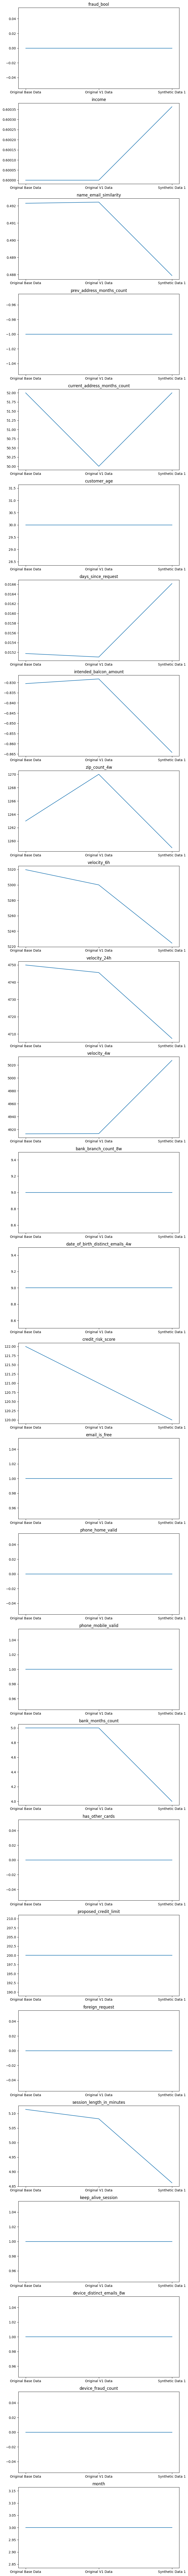

In [ ]:
n_plots = all_medians.shape[0]

fig, ax = plt.subplots(n_plots, 1, figsize=(8, 4 * n_plots), tight_layout=True)

for i in range(n_plots):
    name = all_medians.iloc[i,:].name
    ax[i].plot(all_medians.iloc[i,:])
    ax[i].set_title(name)

fig.show()

In [ ]:
bd_mean = base_df.mean(numeric_only=True)
v1_mean = v1_df.mean(numeric_only=True)
sd_1_mean = synthetic_1_df.mean(numeric_only=True)

In [ ]:
#all_means = pd.concat([bd_mean, v124_mean, sd_0_mean, sd_1_mean, sd_2_mean], axis=1)
#all_means.columns = ["Original Base Data", "Original V124 Data", "Synthetic Data 0", "Synthetic Data 1", "Synthetic Data 2"]

all_means = pd.concat([bd_mean, v1_mean, sd_1_mean], axis=1)
all_means.columns = ["Original Base Data", "Original V1 Data", "Synthetic Data 1"]

all_means

,Original Base Data,Original V1 Data,Synthetic Data 1
fraud_bool,0.011029,0.011029,0.011041
income,0.562696,0.560867,0.560292
name_email_similarity,0.493694,0.494652,0.482263
prev_address_months_count,16.718568,16.960120,18.256024
current_address_months_count,86.587867,83.585392,91.223772
customer_age,33.689080,31.974200,34.447743
days_since_request,1.025705,1.051720,0.929374
intended_balcon_amount,8.661499,8.715090,6.755990
zip_count_4w,1572.692049,1574.468789,1535.463380
velocity_6h,5665.296605,5661.914760,5535.657597


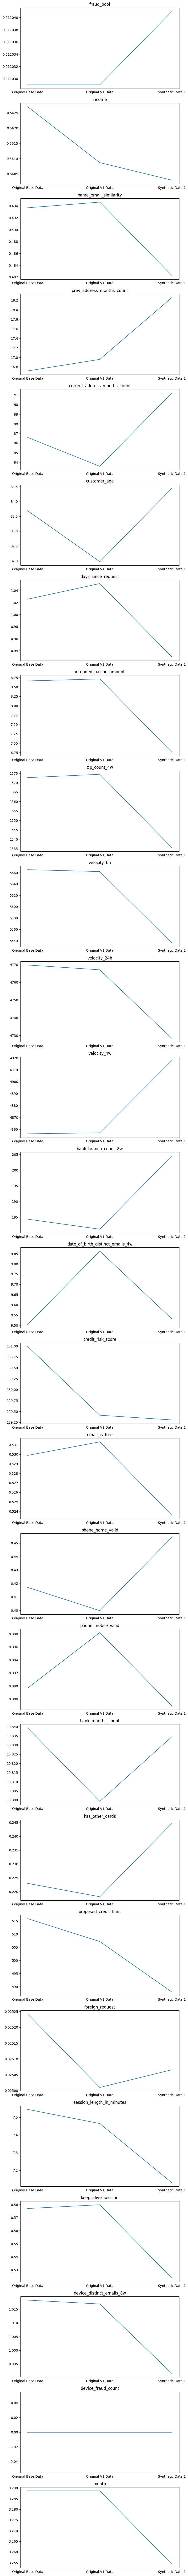

In [ ]:
n_plots = all_means.shape[0]

fig, ax = plt.subplots(n_plots, 1, figsize=(8, 4 * n_plots), tight_layout=True)

for i in range(n_plots):
    name = all_means.iloc[i,:].name
    ax[i].plot(all_means.iloc[i,:])
    ax[i].set_title(name)

fig.show()

In [ ]:
bd_std = base_df.std(numeric_only=True)
v1_std = v1_df.std(numeric_only=True)
sd_1_std = synthetic_1_df.std(numeric_only=True)

In [ ]:
#all_stds = pd.concat([bd_std, v124_std, sd_0_std, sd_1_std, sd_2_std], axis=1)
#all_stds.columns = ["Original Base Data", "Original V124 Data", "Synthetic Data 0", "Synthetic Data 1", "Synthetic Data 2"]

all_stds = pd.concat([bd_std, v1_std, sd_1_std], axis=1)
all_stds.columns = ["Original Base Data", "Original V1 Data", "Synthetic Data 1"]

all_stds

,Original Base Data,Original V1 Data,Synthetic Data 1
fraud_bool,0.104438,0.104438,0.104495
income,0.290343,0.290389,0.289701
name_email_similarity,0.289125,0.288847,0.287795
prev_address_months_count,44.046230,43.870653,44.838070
current_address_months_count,88.406599,86.458280,93.946253
customer_age,12.025799,10.897167,12.477076
days_since_request,5.381835,5.462110,3.419026
intended_balcon_amount,20.236155,20.210541,18.185129
zip_count_4w,1005.374565,1003.700453,971.654511
velocity_6h,3009.380665,3010.869604,3022.212834


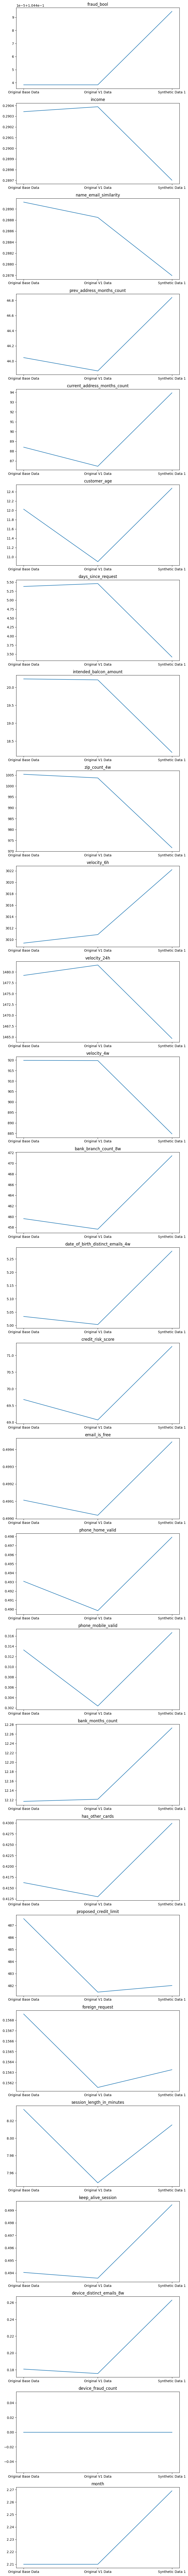

In [ ]:
n_plots = all_stds.shape[0]

fig, ax = plt.subplots(n_plots, 1, figsize=(8, 4 * n_plots), tight_layout=True)

for i in range(n_plots):
    name = all_stds.iloc[i,:].name
    ax[i].plot(all_stds.iloc[i,:])
    ax[i].set_title(name)

fig.show()

# LGBM Adversarial Training

### Merge Base and V124 dataset

In [ ]:
df_cols = synthetic_1_df.columns
len(df_cols)

32

In [ ]:
# Declaration of categorical featuers
CATEGORICAL_FEATURES = [
    'source',
    'payment_type',
    'device_os',
    'housing_status',
    'employment_status',
    'month'
]

In [ ]:
def adversarial_valid(train:pd.DataFrame, test: pd.DataFrame, columns:list, categorical_columns:list, plot_importance=True):

    # CREATE A TARGET SERIES WITH 0 VALUES CORRESPONDING TO TRAIN EXAMPLES WHEREAS VALUE 1 FOR TEST EXAMPLES
    target = np.hstack([np.zeros(train.shape[0]), np.ones(test.shape[0])])

    # Combine train and test set
    train = pd.concat([train,test],axis=0)
    train = train[columns]

    # Encode categorical columns as LGBM doesn't accept string type columns as input
    for col in categorical_columns:
        if train[col].dtype == object:
            encoder=LabelEncoder()
            train[col] = encoder.fit_transform(train[col].to_list())


    # Create a new train and test set -- Not just melb train, sydney test.
    train, test, y_train, y_test = model_selection.train_test_split(train, target, test_size=0.33, random_state=1,
                                                                    shuffle=True)

    # Convert to LGBM Dataset to prepare LGBM training
    train = lgb.Dataset(train, label=y_train, categorical_feature=categorical_columns)
    test = lgb.Dataset(test, label=y_test, categorical_feature=categorical_columns)

    # Set the parameters. -- It is a 2-class classification task so objective is binary
    param = {'objective': 'binary',
             'learning_rate': 0.01,
             "boosting": "gbdt",
             "metric": 'auc',
             "verbosity": -1}

    # Train the classifier
    clf = lgb.train(param, train,
                    num_boost_round=200, valid_sets=[train, test],
                    callbacks=[
                        lgb.early_stopping(stopping_rounds=50),
                      ]
                    )

    # Draw Feature importance graph

    feature_imp = pd.DataFrame(sorted(zip(clf.feature_importance(importance_type="gain"), clf.feature_name())), columns=['Feature Split Total Gain', 'Feature'])
    if not plot_importance:
        return clf, feature_imp
    else:
        plt.figure(figsize=(5, 5))
        sns.barplot(x="Feature Split Total Gain", y="Feature", data=feature_imp.sort_values(by="Feature Split Total Gain", ascending=False).head(100))
        plt.title('LightGBM - Feature Importance')
        plt.tight_layout()
        plt.show()

        return clf, feature_imp


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[127]	training's auc: 0.545308	valid_1's auc: 0.541419


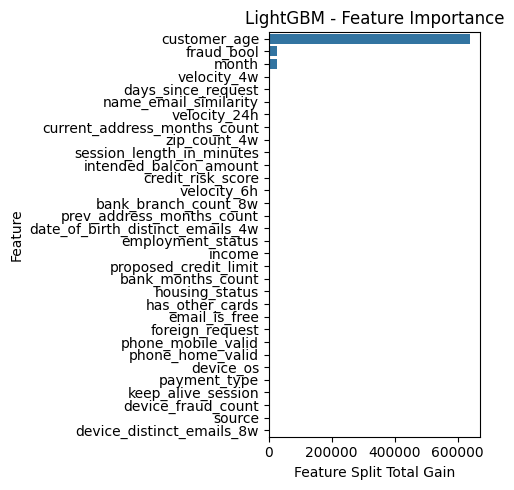

(<lightgbm.basic.Booster at 0x7e3cb7fefcd0>,
     Feature Split Total Gain                           Feature
 0                   0.000000         device_distinct_emails_8w
 1                   0.000000                device_fraud_count
 2                   0.000000                            source
 3                   7.385800                keep_alive_session
 4                   7.546220                      payment_type
 5                   8.503560                         device_os
 6                  21.565810                  phone_home_valid
 7                  56.311880                phone_mobile_valid
 8                  61.764440                   foreign_request
 9                  97.751480                     email_is_free
 10                168.151740                   has_other_cards
 11                192.461751                    housing_status
 12                270.628429                 bank_months_count
 13                422.715220             proposed_credit_l

In [ ]:
adversarial_valid(base_df, v1_df, df_cols, CATEGORICAL_FEATURES, plot_importance=True)

Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[200]	training's auc: 0.989738	valid_1's auc: 0.989688


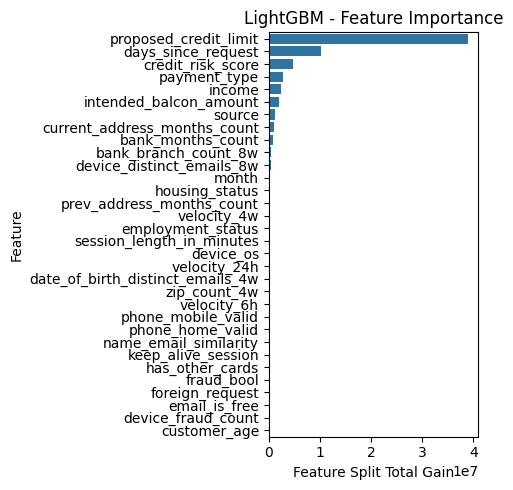

(<lightgbm.basic.Booster at 0x7e3cb7eb4a60>,
     Feature Split Total Gain                           Feature
 0               0.000000e+00                      customer_age
 1               0.000000e+00  date_of_birth_distinct_emails_4w
 2               0.000000e+00                device_fraud_count
 3               0.000000e+00                     email_is_free
 4               0.000000e+00                   foreign_request
 5               0.000000e+00                        fraud_bool
 6               0.000000e+00                   has_other_cards
 7               0.000000e+00                keep_alive_session
 8               0.000000e+00             name_email_similarity
 9               0.000000e+00                  phone_home_valid
 10              0.000000e+00                phone_mobile_valid
 11              0.000000e+00                       velocity_6h
 12              0.000000e+00                      zip_count_4w
 13              9.920340e+03                      velocity

In [ ]:
adversarial_valid(base_df, synthetic_0_df, df_cols, CATEGORICAL_FEATURES, plot_importance=True)

Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[200]	training's auc: 0.992468	valid_1's auc: 0.992508


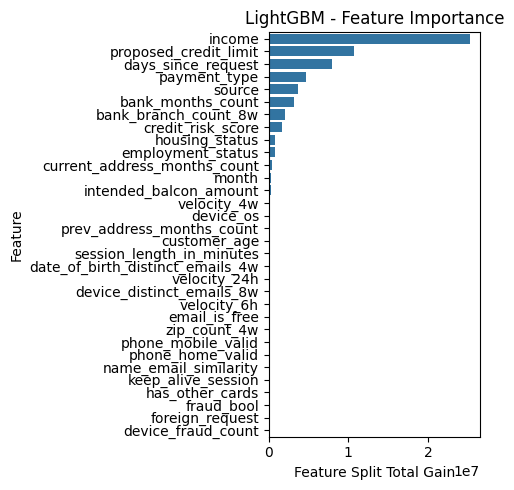

(<lightgbm.basic.Booster at 0x7e3cc12a3790>,
     Feature Split Total Gain                           Feature
 0               0.000000e+00                device_fraud_count
 1               0.000000e+00                     email_is_free
 2               0.000000e+00                   foreign_request
 3               0.000000e+00                        fraud_bool
 4               0.000000e+00                   has_other_cards
 5               0.000000e+00                keep_alive_session
 6               0.000000e+00             name_email_similarity
 7               0.000000e+00                  phone_home_valid
 8               0.000000e+00                phone_mobile_valid
 9               0.000000e+00                      zip_count_4w
 10              1.003830e+03                       velocity_6h
 11              4.886540e+03         device_distinct_emails_8w
 12              7.034420e+03                      velocity_24h
 13              7.678890e+03  date_of_birth_distinct_email

In [ ]:
adversarial_valid(base_df, synthetic_1_df, df_cols, CATEGORICAL_FEATURES, plot_importance=True)

Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[200]	training's auc: 0.994657	valid_1's auc: 0.994669


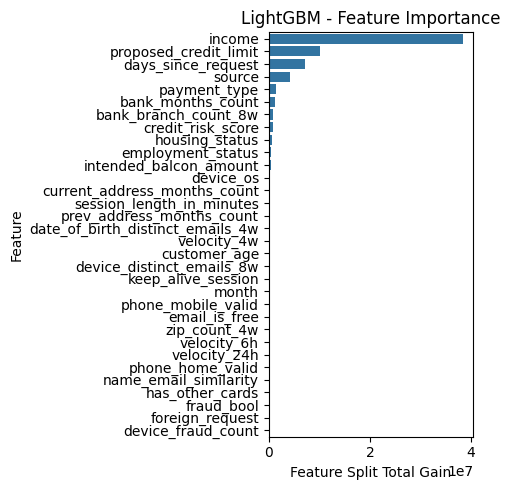

(<lightgbm.basic.Booster at 0x7e3cc11f3310>,
     Feature Split Total Gain                           Feature
 0               0.000000e+00                device_fraud_count
 1               0.000000e+00                     email_is_free
 2               0.000000e+00                   foreign_request
 3               0.000000e+00                        fraud_bool
 4               0.000000e+00                   has_other_cards
 5               0.000000e+00             name_email_similarity
 6               0.000000e+00                  phone_home_valid
 7               0.000000e+00                      velocity_24h
 8               0.000000e+00                       velocity_6h
 9               0.000000e+00                      zip_count_4w
 10              4.271410e+03                phone_mobile_valid
 11              2.294065e+04                             month
 12              3.196019e+04                keep_alive_session
 13              4.112603e+04         device_distinct_email

In [ ]:
adversarial_valid(base_df, synthetic_2_df, df_cols, CATEGORICAL_FEATURES, plot_importance=True)

Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[200]	training's auc: 0.990151	valid_1's auc: 0.990117


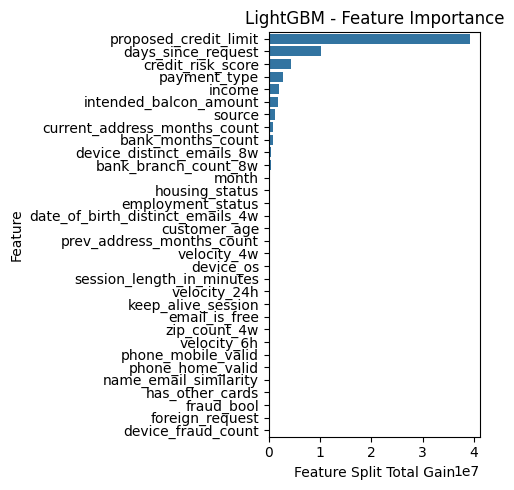

(<lightgbm.basic.Booster at 0x7e3cc11f2920>,
     Feature Split Total Gain                           Feature
 0               0.000000e+00                device_fraud_count
 1               0.000000e+00                     email_is_free
 2               0.000000e+00                   foreign_request
 3               0.000000e+00                        fraud_bool
 4               0.000000e+00                   has_other_cards
 5               0.000000e+00             name_email_similarity
 6               0.000000e+00                  phone_home_valid
 7               0.000000e+00                phone_mobile_valid
 8               0.000000e+00                       velocity_6h
 9               0.000000e+00                      zip_count_4w
 10              1.982956e+03                keep_alive_session
 11              9.069630e+03                      velocity_24h
 12              2.740079e+04         session_length_in_minutes
 13              3.379031e+04                         devic

In [ ]:
adversarial_valid(v1_df, synthetic_0_df, df_cols, CATEGORICAL_FEATURES, plot_importance=True)

Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[200]	training's auc: 0.992184	valid_1's auc: 0.992215


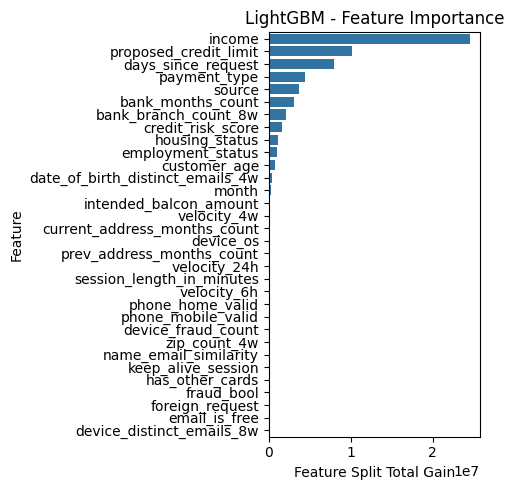

(<lightgbm.basic.Booster at 0x7e3ccec93760>,
     Feature Split Total Gain                           Feature
 0               0.000000e+00         device_distinct_emails_8w
 1               0.000000e+00                device_fraud_count
 2               0.000000e+00                     email_is_free
 3               0.000000e+00                   foreign_request
 4               0.000000e+00                        fraud_bool
 5               0.000000e+00                   has_other_cards
 6               0.000000e+00                keep_alive_session
 7               0.000000e+00             name_email_similarity
 8               0.000000e+00                      zip_count_4w
 9               2.924350e+03                phone_mobile_valid
 10              2.989440e+03                  phone_home_valid
 11              4.922014e+03                       velocity_6h
 12              1.057087e+04         session_length_in_minutes
 13              2.232828e+04                      velocity

In [ ]:
adversarial_valid(v1_df, synthetic_1_df, df_cols, CATEGORICAL_FEATURES, plot_importance=True)

Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[200]	training's auc: 0.994789	valid_1's auc: 0.994748


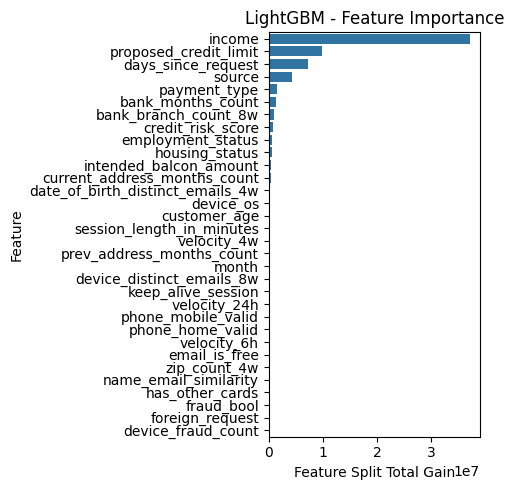

(<lightgbm.basic.Booster at 0x7e3ccec90f40>,
     Feature Split Total Gain                           Feature
 0               0.000000e+00                device_fraud_count
 1               0.000000e+00                     email_is_free
 2               0.000000e+00                   foreign_request
 3               0.000000e+00                        fraud_bool
 4               0.000000e+00                   has_other_cards
 5               0.000000e+00             name_email_similarity
 6               0.000000e+00                      zip_count_4w
 7               1.788384e+03                       velocity_6h
 8               6.074247e+03                  phone_home_valid
 9               8.842077e+03                phone_mobile_valid
 10              9.581431e+03                      velocity_24h
 11              3.294805e+04                keep_alive_session
 12              3.727351e+04         device_distinct_emails_8w
 13              4.289721e+04                             m

In [ ]:
adversarial_valid(v1_df, synthetic_2_df, df_cols, CATEGORICAL_FEATURES, plot_importance=True)

LGBM Adversarial Training seems to support that synthetic dataset 1 is most similar to base/v124 datasets, but discrepancies between proposed_credit_limit and days_since_request prevent it from being a better match